# Analysis notebook: `SU2020_CRY_offspill-LH_as`  

## Define analysis name

In [1]:
ana_label = "SU2020_CRY_offspill-LH_as"

## Preamble

In [2]:
from preamble import *

## Load data

In [3]:
!ls ../../output/results/SU2020_CRY_offspill-LH_as

cut_flow.csv	events.parquet	info.txt     SU2020_CRY_offspill-LH_as.log
efficiency.csv	hists.h5	results.pkl  SU2020_CRY_offspill-LH_as.yaml


In [4]:
loader = Load(
    in_path = f"../../output/results/{ana_label}"
)

[Load] ✅ Initialised with out_path=../../output/results/SU2020_CRY_offspill-LH_as


In [5]:
results = loader.load_pkl() 
results_from_persistent = loader.load_all() # Persistent backup 

[Load] ✅ Successfully loaded results from ../../output/results/SU2020_CRY_offspill-LH_as/results.pkl
[Load] ✅ Loaded cut stats from ../../output/results/SU2020_CRY_offspill-LH_as/cut_flow.csv
[Load] ✅ Loaded histograms from ../../output/results/SU2020_CRY_offspill-LH_as/hists.h5
[Load] ✅ Loaded efficiency info from ../../output/results/SU2020_CRY_offspill-LH_as/efficiency.csv
[Load] ✅ Successfully loaded ak.Array from ../../output/results/SU2020_CRY_offspill-LH_as/events.parquet
[Load] ✅ Loaded info from ../../output/results/SU2020_CRY_offspill-LH_as/info.txt


## Analyse results

### Cut flow

In [6]:
display(results["cut_flow"])

,Cut,Events Passing,Absolute [%],Relative [%],Description
0,No cuts,5754129,100.000000,100.000000,No selection applied
1,is_reco_electron,5351815,93.008255,93.008255,Electron track fits
2,has_trk_front,5246599,91.179725,98.034013,Tracks intersect tracker entrance
3,good_trkqual,985883,17.133488,18.790897,Track fit quality > 0.8
4,is_downstream,675042,11.731437,68.470802,Downstream tracks (p_z > 0 at tracker entrance)
5,has_hits,673612,11.706585,99.788161,>20 active tracker hits
6,within_t0err,644455,11.199871,95.671544,Track fit t0 uncertainty (t0err < 0.9 ns)
7,within_d0,113228,1.967770,17.569574,Distance of closest approach (d_0 < 100 mm)
8,within_pitch_angle,60629,1.053661,53.545943,Extrapolated pitch angle (0.5 < tan(theta_Dip)...
9,within_lhr_max_hi,50225,0.872851,82.839895,Loop helix maximum radius (R_max < 680 mm)


### Histograms

In [7]:
draw = Draw()

# Define image directory
img_dir = f"../../output/images/{ana_label}"
os.makedirs(img_dir, exist_ok=True)

[Plot] ⭐️ Initialised


[Plot] ✅ 	Wrote ../../output/images/SU2020_CRY_offspill-LH_as/h1o_1x3_mom_windows.png


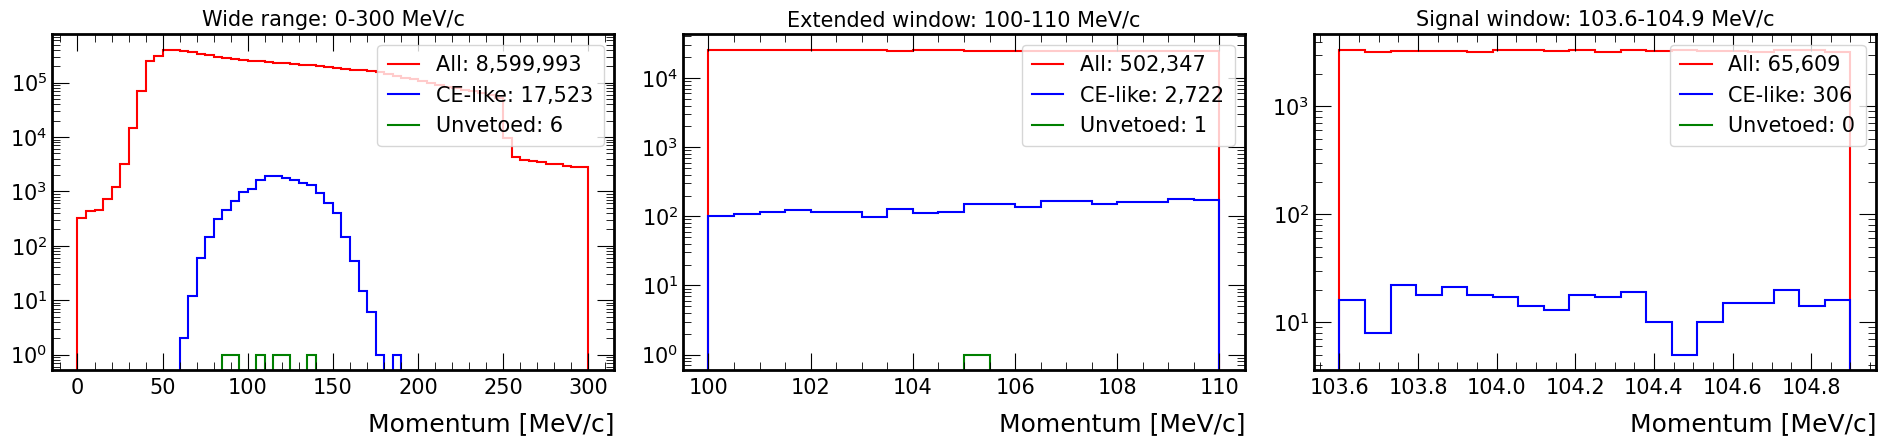

In [8]:
draw.plot_mom_windows(results["hists"], out_path=f"{img_dir}/h1o_1x3_mom_windows.png") 

[Plot] ✅ 	Wrote ../../output/images/SU2020_CRY_offspill-LH_as/h1o_crv_zwindows.png


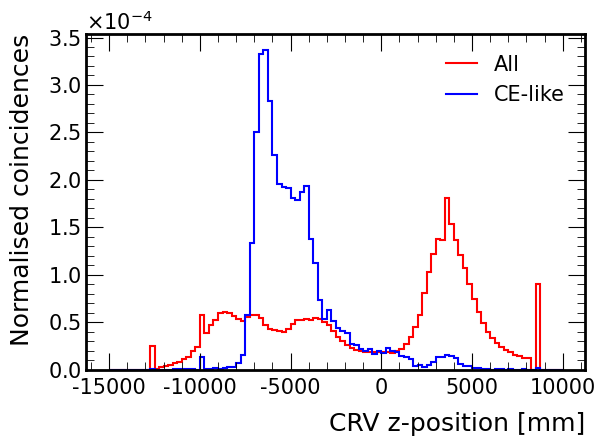

In [9]:
draw.plot_crv_z(results["hists"], out_path=f"{img_dir}/h1o_crv_zwindows.png") 

In [ ]:
draw.plot_trk_params(results["hists"])
# draw.plot_trk_params_SU2020(results["hists"])

In [ ]:
# draw.plot_trkfit_params(results["hists"])
draw.plot_trkfit_params_SU2020(results["hists"])

### Efficiency 

In [ ]:
display(results["efficiency"])

### Background event info

In [ ]:
print(results["event_info"])

In [ ]:
if results["events"] is not None:
    from pyutils.pyprint import Print
    printer = Print()
    printer.print_n_events(results["events"], n_events = len(results["events"]))